Sales Prediction Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn


In [ ]:
dataset=pd.read_csv("advertising_sales_data.csv")
dataset.head()

Campaign     TV  Radio  Newspaper  Sales
0    camp1  230.1   37.8       69.2   22.1
1    camp2   44.5   39.3       45.1   10.4
2    camp3   17.2   45.9       69.3   12.0
3    camp4  151.5   41.3       58.5   16.5
4    camp5  180.8   10.8       58.4   17.9

1)finding mean expenditure on TV advertising

In [ ]:
tv=dataset.iloc[:,[1]]
#print(tv)

mean=dataset.iloc[:,[1]].mean()
print("mean expenditure on tv advertising is:",mean)

mean expenditure on tv advertising is: TV    147.0425
dtype: float64


2)correlation between radio advertising and product sales

In [ ]:
#filling NaN values using mean
from sklearn.impute import SimpleImputer
  imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
  imputer.fit(dataset.iloc[:,[1,2,3,4]])
  dataset.iloc[:,[1,2,3,4]]=imputer.transform(dataset.iloc[:,[1,2,3,4]])


In [ ]:
#finding corelation of radio by linear regression
from sklearn.model_selection import train_test_split
X=dataset.iloc[:,[2]]
y=dataset.iloc[:,[4]]
X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(X,y,test_size=0.2,random_state=1)
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_2,y_train_2)
y_pred=regressor.predict(X_test_2)
coefficient=regressor.coef_
intercept=regressor.intercept_
print("relationship between radio advertising and sales has coefficient:",coefficient)
from sklearn.metrics import mean_absolute_error
print("mean absolute error when only radio is considered",mean_absolute_error(y_test_2,y_pred))


relationship between radio advertising and sales has coefficient: [[0.12691549]]
mean absolute error when only radio is considered 3.851784425720086


Text(0.5, 0, 'radio advertising')

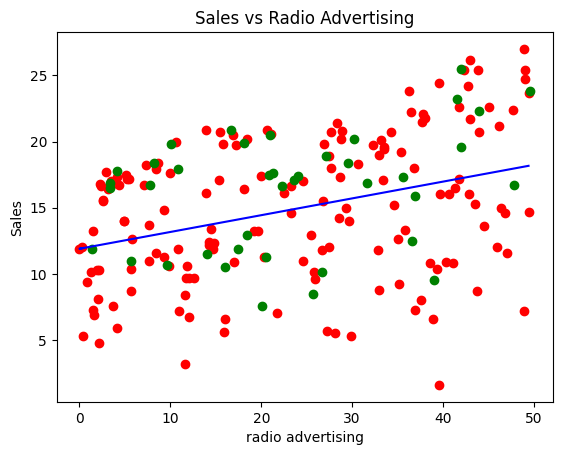

In [ ]:
#finding how well model performed(through visualisation)
plt.scatter(X_train_2,y_train_2,color='red')
plt.scatter(X_test_2,y_test_2,color='green')
plt.plot(X_train_2,regressor.predict(X_train_2),color='blue')
plt.title('Sales vs Radio Advertising')
plt.ylabel('Sales')
plt.xlabel('radio advertising')

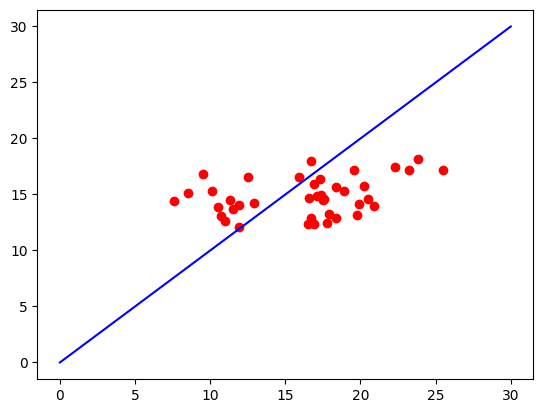

In [ ]:
plt.scatter(y_test_2,y_pred,color='red')
x=np.linspace(0,30,30)
plt.plot(x,x,color='blue')
plt.show()

3)Which advertising medium has the highest impact on sales based on the dataset?

In [ ]:
X_1=dataset.iloc[:,[1]]
X_3=dataset.iloc[:,[3]]
y=dataset.iloc[:,[4]]
X_train,X_test,y_train,y_test=train_test_split(X_1,y,test_size=0.2,random_state=1)
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
coefficient_1=regressor.coef_

X_train,X_test,y_train,y_test=train_test_split(X_3,y,test_size=0.2,random_state=1)
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
coefficient_3=regressor.coef_
#print(coefficient)

print("coefficient between TV advertising and sales:",coefficient_1)
print("coefficient between radio advertising and sales:",coefficient)
print("coefficient between newspaper advertising and sales:",coefficient_3)

coefficient between TV advertising and sales: [[0.05643984]]
coefficient between radio advertising and sales: [[0.12691549]]
coefficient between newspaper advertising and sales: [[0.04688524]]


In [ ]:
print("hence radio has the highest coefficient and is the most important")

hence radio has the highest coefficient and is the most important


4)linear regression

In [ ]:
#finding corelation of radio by linear regression
X=dataset.iloc[:,[1,2,3]]
y=dataset.iloc[:,[4]]
#print(X,y)
import sklearn
from sklearn.model_selection import train_test_split
#splitting data set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print("new coefficients",regressor.coef_)


new coefficients [[ 0.05507913  0.10310711 -0.00091872]]


Text(0, 0.5, 'predicted sales value')

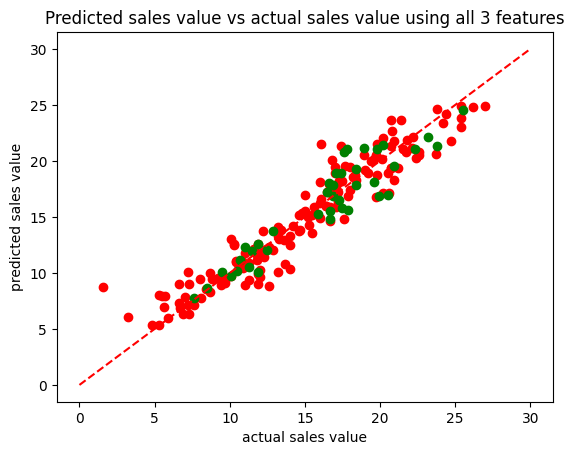

In [ ]:
#finding how well model performed(through visualisation)
plt.scatter(y_train,regressor.predict(X_train),color='red')
plt.scatter(y_test,regressor.predict(X_test),color='green')
x = np.linspace(0, 30, 30)  # Generates 100 points between 0 and 100

# Plot the x = y line
plt.plot(x, x, linestyle="dashed", color="red", label="y = x (Perfect Fit)")

plt.title('Predicted sales value vs actual sales value using all 3 features')
plt.xlabel('actual sales value')
plt.ylabel('predicted sales value')

In [ ]:
from sklearn.metrics import mean_absolute_error
print("mean absolute error when all 3 features are considered",mean_absolute_error(y_test,y_pred))

mean absolute error when all 3 features are considered 1.2754433562842973


5)5.	How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?

In [ ]:
newy_pred=regressor.predict([[200,40,50]])
print("values of sales for $200 on TV, $40 on Radio, and $50 on Newspaper:",newy_pred)

values of sales for $200 on TV, $40 on Radio, and $50 on Newspaper: [[19.7321937]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6)6.	How does the performance of the linear regression model change when the dataset is normalized?

In [ ]:
from sklearn import preprocessing
A=dataset.iloc[:,[1,2,3,4]]
normalized_data=preprocessing.normalize(A)
N_train,N_test,n_train,n_test=train_test_split(normalized_data,y,test_size=0.2,random_state=1)
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(N_train,n_train)
y_pred=regressor.predict(N_test)


Text(0, 0.5, 'predicted sales value')

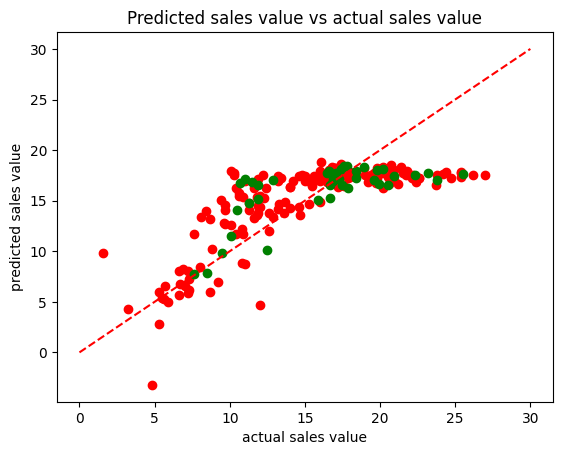

In [ ]:
#finding how well model performed(through visualisation)
plt.scatter(n_train,regressor.predict(N_train),color='red')
plt.scatter(n_test,regressor.predict(N_test),color='green')
x = np.linspace(0, 30, 30)  # Generates 100 points between 0 and 100

# Plot the x = y line
plt.plot(x, x, linestyle="dashed", color="red", label="y = x (Perfect Fit)")

plt.title('Predicted sales value vs actual sales value')
plt.xlabel('actual sales value')
plt.ylabel('predicted sales value')

In [ ]:
from sklearn.metrics import mean_absolute_error
print("mean absolute error when data is normalized",mean_absolute_error(n_test,y_pred))

mean absolute error when data is normalized 2.407635237068611


7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?

In [ ]:
regressor.fit(X_train.iloc[:,[1,2]],y_train)  #only
y_pred=regressor.predict(X_test.iloc[:,[1,2]])
print("mean absolute error when only radio and newspapers is considered:",mean_absolute_error(y_test,y_pred))

mean absolute error when only radio and newspapers is considered: 3.8687433716380952


Text(0, 0.5, 'predicted sales value')

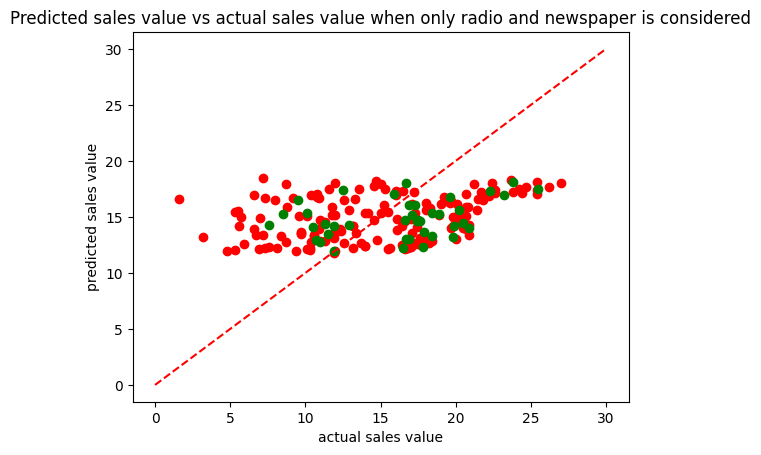

In [ ]:
#finding how well model performed(through visualisation)
plt.scatter(y_train,regressor.predict(X_train.iloc[:,[1,2]]),color='red')
plt.scatter(y_test,y_pred,color='green')
x = np.linspace(0, 30, 30)  # Generates 100 points between 0 and 100

# Plot the x = y line
plt.plot(x, x, linestyle="dashed", color="red", label="y = x (Perfect Fit)")

plt.title('Predicted sales value vs actual sales value when only radio and newspaper is considered')
plt.xlabel('actual sales value')
plt.ylabel('predicted sales value')